Data read done
Data modifying done
Specify test features done
Spliting data done
Fit model done
Prediction done
Mean absolute Error for Extra Trees:  40.652858631140894
Mean squared Error for Extra Trees:  3380.6017999627397
Creating DataFrame done


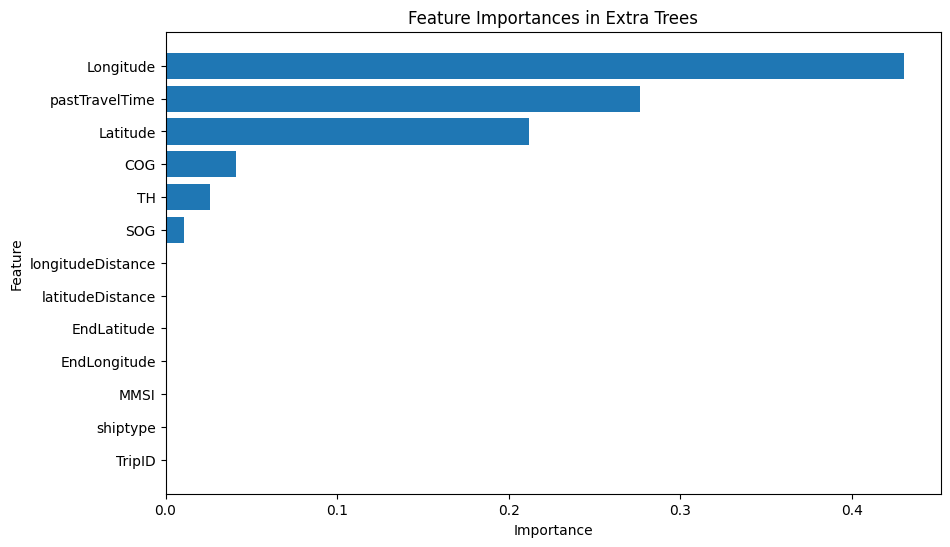

Plotting feature importance done


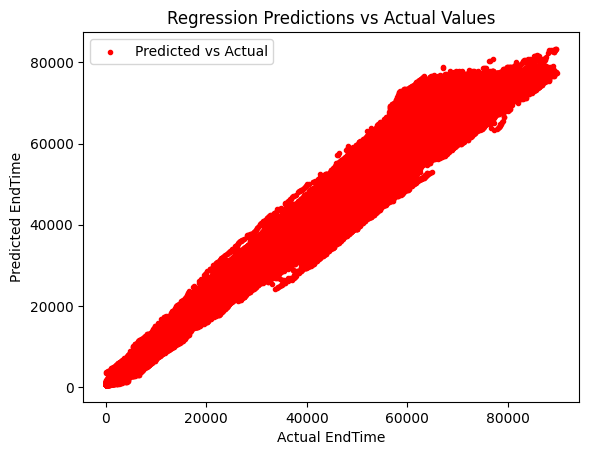

Plotting results done
All done


In [14]:
import pandas as pd
import numpy as np
import sys 
from numpy import mean, std
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint


#use given csv data for the model
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean.csv", on_bad_lines="warn")
print('Data read done')

#insert time, longitude and latitude traveled 
data.insert(0, "pastTravelTime",(pd.to_datetime(data["time"]) - pd.to_datetime(data["StartTime"])).dt.total_seconds())
data.insert(0, "longitudeDistance", data["EndLongitude"] - data["StartLongitude"])
data.insert(0, "latitudeDistance", data["EndLatitude"] - data["StartLatitude"])
print('Data modifying done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "MMSI", "TripID", "EndLongitude", "EndLatitude", "pastTravelTime", "longitudeDistance", "latitudeDistance"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = (pd.to_datetime(data["EndTime"]) - pd.to_datetime(data["time"])).dt.total_seconds()
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

#define the parameter grid
#param_grid = {
#    'n_estimators': [300], #number of trees in forest (default: 100)
#    'max_features': [0.5], #The number of features to consider when looking for the best split (Default: auto)
#   'min_samples_split': [5], #The minimum number of samples required to split an internal node (Default: 2)
#    'min_samples_leaf': [2], #The minimum number of samples required to be at a leaf node (Default: 1)
#    'max_depth': [10] #The maximum depth of the tree (Default: None (nodes are expanded until all leaves contain less than min_samples_split samples))
#}
#print('Defining Grid done')


#choose Extra Trees as model and train it with the train split sets
model = ExtraTreesRegressor(n_estimators=200, max_features=0.5, min_samples_split=5, min_samples_leaf=2, max_depth=10, random_state=42)

# Use GridSearchCV to search over the parameter grid. Used for hyperparameter optimization to find the best set of hyperparameters.
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#grid_search.fit(X_train, y_train)
#grid_search.fit(X_train, y_train)
#print('Grid Search done')

# Print the best parameters and score
#print("Best parameters found: ", grid_search.best_params_)
#print("Best score: ", np.sqrt(-grid_search.best_score_))

model.fit(X_train,y_train)
print('Fit model done')
#use fractions of data for prediction
y_pred = model.predict(X_test)
print('Prediction done')
    
#Use best parameters to fit the model and make predictions
#best_model = grid_search.best_estimator_
#best_model.fit(X_train, y_train)
#print('Fit model done')
#y_pred = best_model.predict(X_test)
#print('Prediction done')

#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error for Extra Trees: ' , mse/60)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Mean squared Error for Extra Trees: ', rmse)

importances = model.feature_importances_
features = X.columns

#Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Creating DataFrame done')

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Extra Trees')
plt.gca().invert_yaxis()
plt.show()
print('Plotting feature importance done')

#Visualize the results
plt.scatter(y_test,y_pred, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')


X_train_minimized = X_train.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime", "latitudeDistance"], axis=1)
X_test_minimized = X_test.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime", "latitudeDistance"], axis=1)
print('All done')


Data read done
Data modifying done
Specify test features done
Spliting data done
Fit model done
Prediction done
Mean absolute Error for Extra Trees:  41.38662784777027
Mean squared Error for Extra Trees:  3433.554289819935
Creating DataFrame done


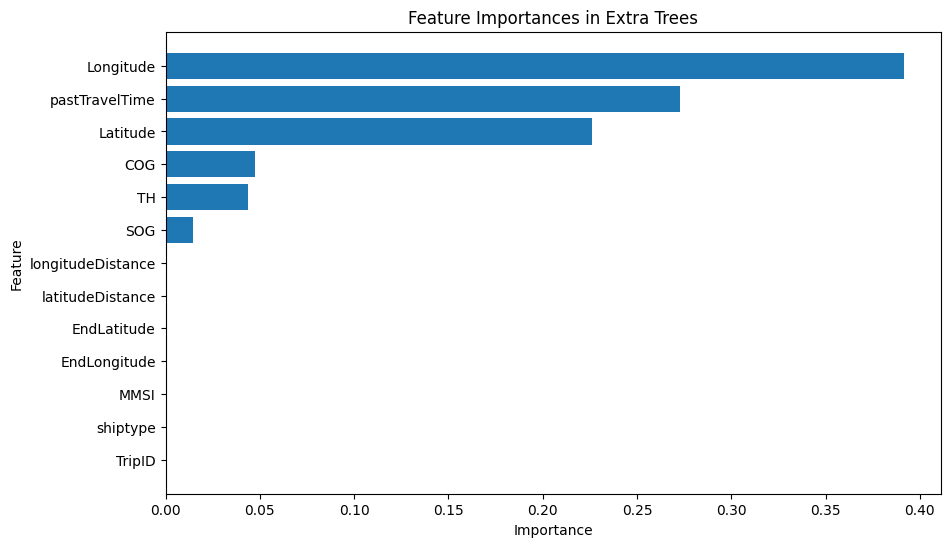

Plotting feature importance done


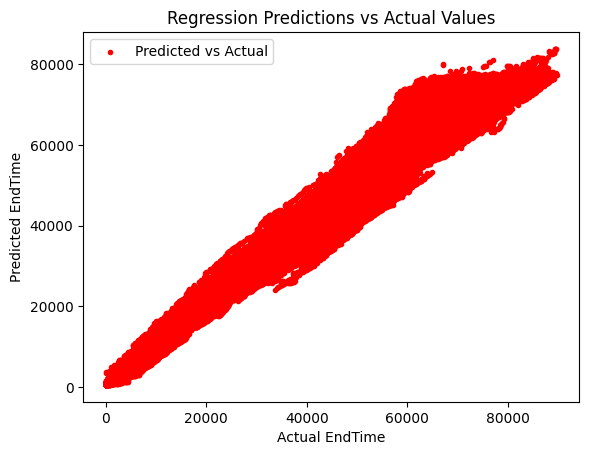

Plotting results done
All done


In [15]:
import pandas as pd
import numpy as np
import sys 
from numpy import mean, std
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint


#use given csv data for the model
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean.csv", on_bad_lines="warn")
print('Data read done')

#insert time, longitude and latitude traveled 
data.insert(0, "pastTravelTime",(pd.to_datetime(data["time"]) - pd.to_datetime(data["StartTime"])).dt.total_seconds())
data.insert(0, "longitudeDistance", data["EndLongitude"] - data["StartLongitude"])
data.insert(0, "latitudeDistance", data["EndLatitude"] - data["StartLatitude"])
print('Data modifying done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "MMSI", "TripID", "EndLongitude", "EndLatitude", "pastTravelTime", "longitudeDistance", "latitudeDistance"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = (pd.to_datetime(data["EndTime"]) - pd.to_datetime(data["time"])).dt.total_seconds()
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

#define the parameter grid
#param_grid = {
#    'n_estimators': [300], #number of trees in forest (default: 100)
#    'max_features': [0.5], #The number of features to consider when looking for the best split (Default: auto)
#   'min_samples_split': [5], #The minimum number of samples required to split an internal node (Default: 2)
#    'min_samples_leaf': [2], #The minimum number of samples required to be at a leaf node (Default: 1)
#    'max_depth': [10] #The maximum depth of the tree (Default: None (nodes are expanded until all leaves contain less than min_samples_split samples))
#}
#print('Defining Grid done')


#choose Extra Trees as model and train it with the train split sets
model = ExtraTreesRegressor(n_estimators=50, max_features=0.5, min_samples_split=5, min_samples_leaf=2, max_depth=10, random_state=42)

# Use GridSearchCV to search over the parameter grid. Used for hyperparameter optimization to find the best set of hyperparameters.
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#grid_search.fit(X_train, y_train)
#grid_search.fit(X_train, y_train)
#print('Grid Search done')

# Print the best parameters and score
#print("Best parameters found: ", grid_search.best_params_)
#print("Best score: ", np.sqrt(-grid_search.best_score_))

model.fit(X_train,y_train)
print('Fit model done')
#use fractions of data for prediction
y_pred = model.predict(X_test)
print('Prediction done')
    
#Use best parameters to fit the model and make predictions
#best_model = grid_search.best_estimator_
#best_model.fit(X_train, y_train)
#print('Fit model done')
#y_pred = best_model.predict(X_test)
#print('Prediction done')

#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error for Extra Trees: ' , mse/60)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Mean squared Error for Extra Trees: ', rmse)

importances = model.feature_importances_
features = X.columns

#Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Creating DataFrame done')

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Extra Trees')
plt.gca().invert_yaxis()
plt.show()
print('Plotting feature importance done')

#Visualize the results
plt.scatter(y_test,y_pred, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')


X_train_minimized = X_train.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime", "latitudeDistance"], axis=1)
X_test_minimized = X_test.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime", "latitudeDistance"], axis=1)
print('All done')

Data read done
Data modifying done
Specify test features done
Spliting data done
Fit model done
Prediction done
Mean absolute Error for Extra Trees:  2.4009753343361293
Mean squared Error for Extra Trees:  381.77132682419887
Creating DataFrame done


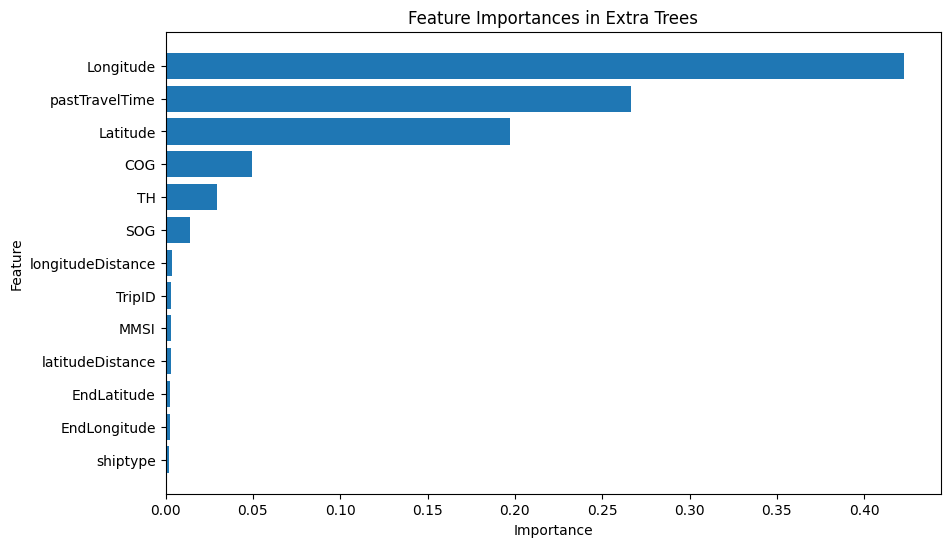

Plotting feature importance done


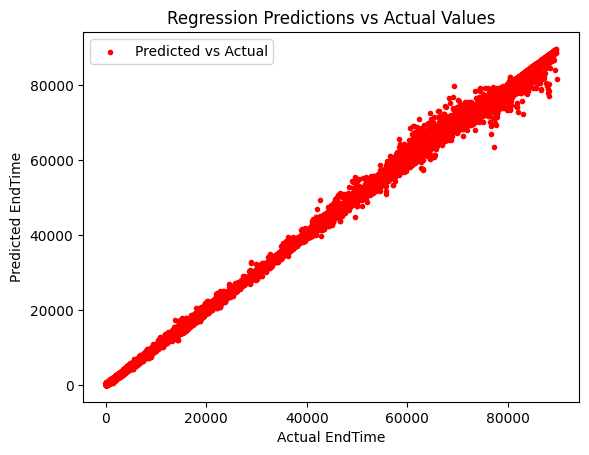

Plotting results done
All done


In [16]:
import pandas as pd
import numpy as np
import sys 
from numpy import mean, std
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint


#use given csv data for the model
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean.csv", on_bad_lines="warn")
print('Data read done')

#insert time, longitude and latitude traveled 
data.insert(0, "pastTravelTime",(pd.to_datetime(data["time"]) - pd.to_datetime(data["StartTime"])).dt.total_seconds())
data.insert(0, "longitudeDistance", data["EndLongitude"] - data["StartLongitude"])
data.insert(0, "latitudeDistance", data["EndLatitude"] - data["StartLatitude"])
print('Data modifying done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "MMSI", "TripID", "EndLongitude", "EndLatitude", "pastTravelTime", "longitudeDistance", "latitudeDistance"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = (pd.to_datetime(data["EndTime"]) - pd.to_datetime(data["time"])).dt.total_seconds()
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

#define the parameter grid
#param_grid = {
#    'n_estimators': [300], #number of trees in forest (default: 100)
#    'max_features': [0.5], #The number of features to consider when looking for the best split (Default: auto)
#   'min_samples_split': [5], #The minimum number of samples required to split an internal node (Default: 2)
#    'min_samples_leaf': [2], #The minimum number of samples required to be at a leaf node (Default: 1)
#    'max_depth': [10] #The maximum depth of the tree (Default: None (nodes are expanded until all leaves contain less than min_samples_split samples))
#}
#print('Defining Grid done')


#choose Extra Trees as model and train it with the train split sets
model = ExtraTreesRegressor(n_estimators=300, max_features=0.5, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=42)

# Use GridSearchCV to search over the parameter grid. Used for hyperparameter optimization to find the best set of hyperparameters.
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#grid_search.fit(X_train, y_train)
#grid_search.fit(X_train, y_train)
#print('Grid Search done')

# Print the best parameters and score
#print("Best parameters found: ", grid_search.best_params_)
#print("Best score: ", np.sqrt(-grid_search.best_score_))

model.fit(X_train,y_train)
print('Fit model done')
#use fractions of data for prediction
y_pred = model.predict(X_test)
print('Prediction done')
    
#Use best parameters to fit the model and make predictions
#best_model = grid_search.best_estimator_
#best_model.fit(X_train, y_train)
#print('Fit model done')
#y_pred = best_model.predict(X_test)
#print('Prediction done')

#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error for Extra Trees: ' , mse/60)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Mean squared Error for Extra Trees: ', rmse)

importances = model.feature_importances_
features = X.columns

#Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Creating DataFrame done')

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Extra Trees')
plt.gca().invert_yaxis()
plt.show()
print('Plotting feature importance done')

#Visualize the results
plt.scatter(y_test,y_pred, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')


X_train_minimized = X_train.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime", "latitudeDistance"], axis=1)
X_test_minimized = X_test.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime", "latitudeDistance"], axis=1)
print('All done')


Data read done
Data modifying done
Specify test features done
Spliting data done
Fit model done
Prediction done
Mean absolute Error for Extra Trees:  1.86267835644491
Mean squared Error for Extra Trees:  293.7862765520282
Creating DataFrame done


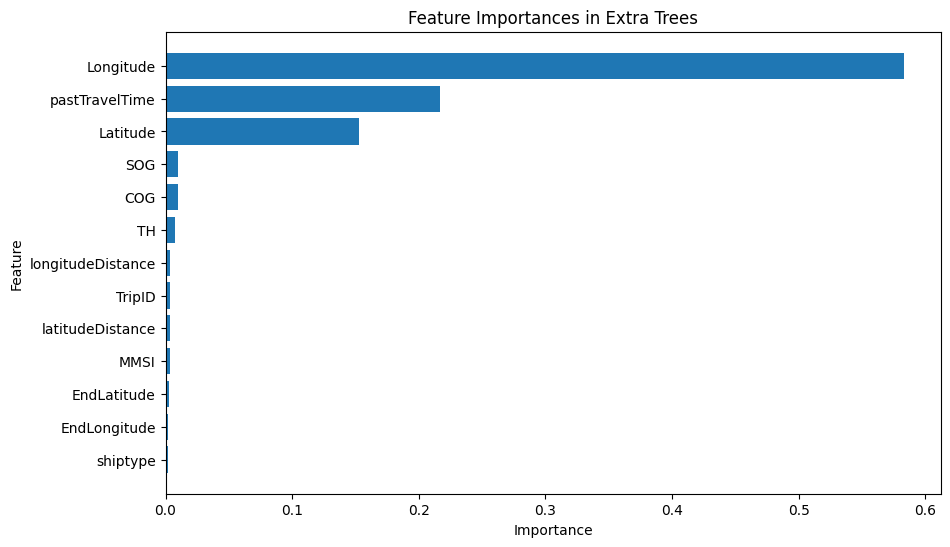

Plotting feature importance done


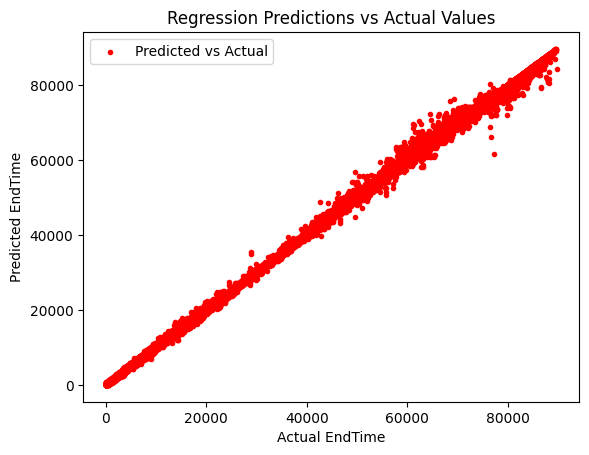

Plotting results done
All done


In [18]:
import pandas as pd
import numpy as np
import sys 
from numpy import mean, std
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint


#use given csv data for the model
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean.csv", on_bad_lines="warn")
print('Data read done')

#insert time, longitude and latitude traveled 
data.insert(0, "pastTravelTime",(pd.to_datetime(data["time"]) - pd.to_datetime(data["StartTime"])).dt.total_seconds())
data.insert(0, "longitudeDistance", data["EndLongitude"] - data["StartLongitude"])
data.insert(0, "latitudeDistance", data["EndLatitude"] - data["StartLatitude"])
print('Data modifying done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "MMSI", "TripID", "EndLongitude", "EndLatitude", "pastTravelTime", "longitudeDistance", "latitudeDistance"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = (pd.to_datetime(data["EndTime"]) - pd.to_datetime(data["time"])).dt.total_seconds()
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

#define the parameter grid
#param_grid = {
#    'n_estimators': [300], #number of trees in forest (default: 100)
#    'max_features': [0.5], #The number of features to consider when looking for the best split (Default: auto)
#   'min_samples_split': [5], #The minimum number of samples required to split an internal node (Default: 2)
#    'min_samples_leaf': [2], #The minimum number of samples required to be at a leaf node (Default: 1)
#    'max_depth': [10] #The maximum depth of the tree (Default: None (nodes are expanded until all leaves contain less than min_samples_split samples))
#}
#print('Defining Grid done')


#choose Extra Trees as model and train it with the train split sets
model = ExtraTreesRegressor(n_estimators=350, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=42)

# Use GridSearchCV to search over the parameter grid. Used for hyperparameter optimization to find the best set of hyperparameters.
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#grid_search.fit(X_train, y_train)
#grid_search.fit(X_train, y_train)
#print('Grid Search done')

# Print the best parameters and score
#print("Best parameters found: ", grid_search.best_params_)
#print("Best score: ", np.sqrt(-grid_search.best_score_))

model.fit(X_train,y_train)
print('Fit model done')
#use fractions of data for prediction
y_pred = model.predict(X_test)
print('Prediction done')
    
#Use best parameters to fit the model and make predictions
#best_model = grid_search.best_estimator_
#best_model.fit(X_train, y_train)
#print('Fit model done')
#y_pred = best_model.predict(X_test)
#print('Prediction done')

#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error for Extra Trees: ' , mse/60)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Mean squared Error for Extra Trees: ', rmse)

importances = model.feature_importances_
features = X.columns

#Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Creating DataFrame done')

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Extra Trees')
plt.gca().invert_yaxis()
plt.show()
print('Plotting feature importance done')

#Visualize the results
plt.scatter(y_test,y_pred, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')


X_train_minimized = X_train.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime", "latitudeDistance"], axis=1)
X_test_minimized = X_test.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime", "latitudeDistance"], axis=1)
print('All done')


Data read done
Data modifying done
Specify test features done
Spliting data done
Fit model done
Prediction done
Mean absolute Error for Extra Trees:  2.7934241264848594
Mean squared Error for Extra Trees:  428.35015721832264
Creating DataFrame done


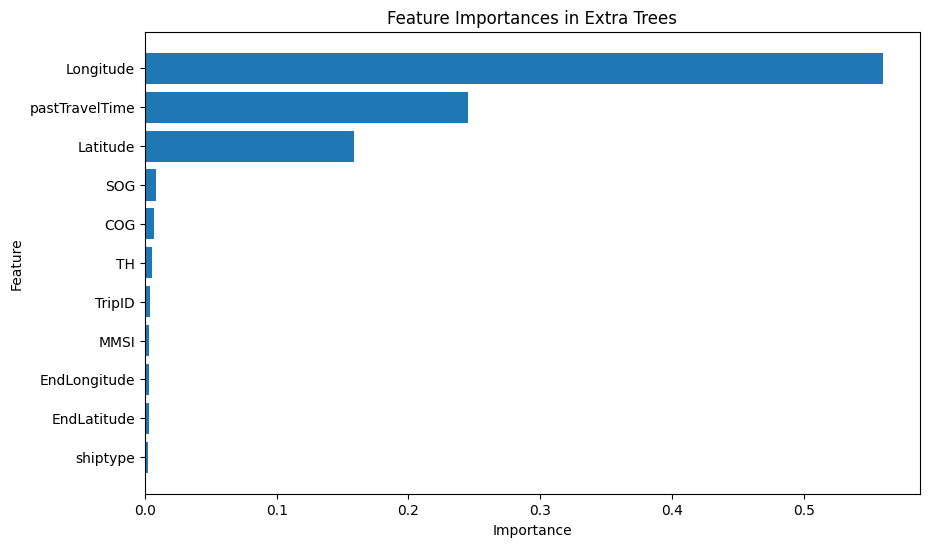

Plotting feature importance done


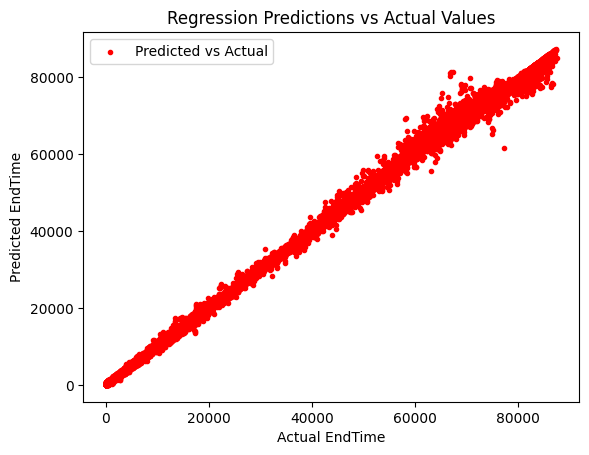

Plotting results done


KeyError: "['latitudeDistance'] not found in axis"

In [3]:
import pandas as pd
import numpy as np
import sys 
from numpy import mean, std
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint


#use given csv data for the model
data = pd.read_csv("../../data/RotHam_cleaned/rotterdam_hamburg_clean_new.csv", on_bad_lines="warn")
print('Data read done')

#insert time, longitude and latitude traveled 
#data.insert(0, "pastTravelTime",(pd.to_datetime(data["time"]) - pd.to_datetime(data["StartTime"])).dt.total_seconds())
#data.insert(0, "longitudeDistance", data["EndLongitude"] - data["StartLongitude"])
#data.insert(0, "latitudeDistance", data["EndLatitude"] - data["StartLatitude"])
print('Data modifying done')

#specify test features
test_features = [ "COG", "TH", "shiptype", "MMSI", "TripID", "EndLongitude", "EndLatitude", "pastTravelTime"]
print('Specify test features done')

#specify test and training sets
#Random state is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
y = (pd.to_datetime(data["EndTime"]) - pd.to_datetime(data["time"])).dt.total_seconds()
X = data[["Latitude", "Longitude", "SOG"] + test_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Spliting data done')

#define the parameter grid
#param_grid = {
#    'n_estimators': [300], #number of trees in forest (default: 100)
#    'max_features': [0.5], #The number of features to consider when looking for the best split (Default: auto)
#   'min_samples_split': [5], #The minimum number of samples required to split an internal node (Default: 2)
#    'min_samples_leaf': [2], #The minimum number of samples required to be at a leaf node (Default: 1)
#    'max_depth': [10] #The maximum depth of the tree (Default: None (nodes are expanded until all leaves contain less than min_samples_split samples))
#}
#print('Defining Grid done')


#choose Extra Trees as model and train it with the train split sets
model = ExtraTreesRegressor(n_estimators=350, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=42)

# Use GridSearchCV to search over the parameter grid. Used for hyperparameter optimization to find the best set of hyperparameters.
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#grid_search.fit(X_train, y_train)
#grid_search.fit(X_train, y_train)
#print('Grid Search done')

# Print the best parameters and score
#print("Best parameters found: ", grid_search.best_params_)
#print("Best score: ", np.sqrt(-grid_search.best_score_))

model.fit(X_train,y_train)
print('Fit model done')
#use fractions of data for prediction
y_pred = model.predict(X_test)
print('Prediction done')
    
#Use best parameters to fit the model and make predictions
#best_model = grid_search.best_estimator_
#best_model.fit(X_train, y_train)
#print('Fit model done')
#y_pred = best_model.predict(X_test)
#print('Prediction done')

#Evaluate the model (Perfect MAE = 0)
#Give out MAE of the prediction set compared to the test set
#MAE in minutes
mse = mean_absolute_error(y_test, y_pred)
print('Mean absolute Error for Extra Trees: ' , mse/60)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Mean squared Error for Extra Trees: ', rmse)

importances = model.feature_importances_
features = X.columns

#Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print('Creating DataFrame done')

#Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Extra Trees')
plt.gca().invert_yaxis()
plt.show()
print('Plotting feature importance done')

#Visualize the results
plt.scatter(y_test,y_pred, marker='.',color='red', label='Predicted vs Actual')  # type: ignore
plt.xlabel('Actual EndTime')
plt.ylabel('Predicted EndTime')
plt.title('Regression Predictions vs Actual Values')
plt.legend()
plt.show()
print('Plotting results done')


X_train_minimized = X_train.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime", "latitudeDistance"], axis=1)
X_test_minimized = X_test.drop(["COG", "TH", "shiptype", "EndLongitude", "EndLatitude", "pastTravelTime", "latitudeDistance"], axis=1)
print('All done')
